# Analyzing Categorical & Numerical Data with Pandas

Last practice we specifically focused on time series data where each numerical value was associated with a particular date. This time, we will focus on a more complex & realistic data scenario where we are working with dates, numerical, and categorical values all at once. 

## Data set up 

We will be working with [NASA data](https://www.kaggle.com/datasets/adityaramachandran27/nasa-near-earth-objects-information) that describes near-earth objects or "NEOs". NEOs include any small body in the solar system whose orbit brings it in close proximity to Earth, such as comets and asteroids. 

The data is in the `NASA Near-Earth Objects.csv` file, which contains a mix of categorical data and numerical data. Let's read the file in and take a peek at the contents.  

In [1]:
import pandas as pd 

neo = pd.read_csv('NASA Near-Earth Objects.csv', nrows = 100)
neo.drop(columns = 'Unnamed: 0', inplace = True)
neo.head()

,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


Note the differences in the contents of the various columns. The categorical data is mostly in the form of text/strings, and the numbers that are there are actually classifications - e.g. `orbit_id` indicates a certain type of orbit rather than rather than a numeric value. The other numbers are true numeric values that indicate some measurement. 

Let's use `.describe()` to provide a quick summary of a dataframe's numeric contents. Here we see the summary statistics of each of our numeric data columns. 

You will also see that the string based categorical variables have been dropped, but it has mis-interpreted our `id` column as a numeric value and tried to provide summary statistics on it. This has happened with all the categorical variables of the type `int64` - these are being misinterpreted as numeric values!

In [2]:
neo.describe()

,id,neo_reference_id,designation,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,perihelion_distance,aphelion_distance
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.004366e+06,2.004366e+06,4365.570000,16.315200,1.852060,4.141332,245.970000,0.892326,2.800825
std,1.329039e+03,1.329039e+03,1329.038768,1.608377,1.319269,2.949975,172.362693,0.288459,1.057404
min,2.001981e+06,2.001981e+06,1981.000000,12.580000,0.184737,0.413086,17.000000,0.140146,1.143633
25%,2.003361e+06,2.003361e+06,3360.750000,15.227500,0.923817,2.065717,131.750000,0.639333,2.005025
50%,2.004486e+06,2.004486e+06,4486.500000,16.030000,1.654092,3.698661,200.500000,0.957297,2.845441
75%,2.005622e+06,2.005622e+06,5621.500000,17.295000,2.393624,5.352305,327.250000,1.132804,3.418938
max,2.006489e+06,2.006489e+06,6489.000000,20.790000,8.101305,18.115068,777.000000,1.294678,7.284240


In [3]:
print(neo.dtypes)

id                                     int64
neo_reference_id                       int64
name                                  object
name_limited                          object
designation                            int64
absolute_magnitude_h                 float64
is_potentially_hazardous_asteroid       bool
is_sentry_object                        bool
kilometers_estimated_diameter_min    float64
kilometers_estimated_diameter_max    float64
orbit_id                               int64
orbit_class_type                      object
perihelion_distance                  float64
aphelion_distance                    float64
first_observation_date                object
last_observation_date                 object
orbit_class_description               object
dtype: object


What if we want some summary of the categorical columns? By default, `describe` only shows numeric (or what it believes to be numeric) columns. If we add `include='object'` then we can describe the categorical variables with metrics including count (total number), the number of unique values, top value (most common), and  freq (how often the most common value occured). 

In [4]:
neo.describe(include='object')

,name,name_limited,orbit_class_type,first_observation_date,last_observation_date,orbit_class_description
count,100,80,100,100,100,100
unique,100,80,3,97,82,3
top,4660 Nereus (1982 DB),Amun,APO,1983-09-07,2022-04-09,Near-Earth asteroid orbits which cross the Ear...
freq,1,1,48,2,4,48


This is why it is important to understand your data **types** before beginning analysis! This means not only the data types as python understands them, but also the categorical vs. numerical data type. You will need to treat each data type differently. 

## Pivot

The `describe` method provides a cursory look at some summary statistics, but what if we want a more refined summary, or if we want to start trying to identify connections between our variables? A good option in this case is to use **pivot**, which helps us reshape & reindex data in more useful ways. The pandas [documentation](https://pandas.pydata.org/pandas-docs/dev/user_guide/reshaping.html) provides a good explanation. 

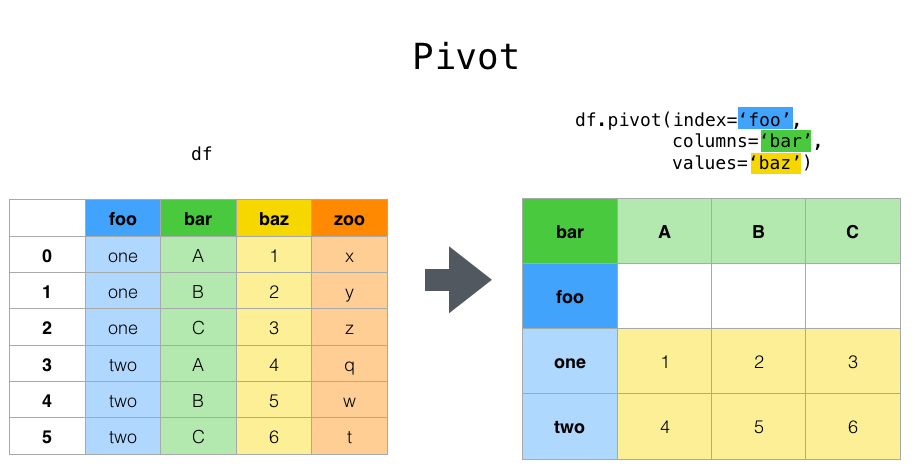

A pivot table is similar to the `groupby` functionality in the sense that both allow you to group and aggregate data. Using a pivot table is a bit better if you want to keep values of both rows **and** columns, and if you want to isolate particular columns. 

Let's use pivot on our `neo` dataframe. Say we want to show the data from `kilometers_estimated_diameter_min` and `kilometers_estimated_diameter_max`. We will use the NEO ID as the index, and split the columns into `True` or `False` based on the `is_potentially_hazardous_asteroid` column. Let's take a look at the result: 

In [5]:
neo_pivoted = neo.pivot(index = 'id', 
          columns = 'is_potentially_hazardous_asteroid', 
          values = ['kilometers_estimated_diameter_min', 'kilometers_estimated_diameter_max']) 

neo_pivoted.head()

kilometers_estimated_diameter_min          \
is_potentially_hazardous_asteroid                             False   True    
id                                                                            
2001981                                                         NaN  2.4019   
2002059                                                    1.700415     NaN   
2002061                                                    1.420872     NaN   
2002062                                                    1.010543     NaN   
2002063                                                    0.930154     NaN   

                                  kilometers_estimated_diameter_max            
is_potentially_hazardous_asteroid                             False     True   
id                                                                             
2001981                                                         NaN  5.370812  
2002059                                                    3.802244       NaN  
2002061                                                    3.177167       NaN  
2002062                                                    2.259644       NaN  
2002063                                                    2.079888       NaN

The dataframe has been reshaped! We now have our numerical data sorted categorically. 

Now we can more easily identify relationships between our variables. We can identify something like the average maximum diameter of potentially hazardous NEOs vs non-potentially hazardous NEOs. 

In [6]:
neo_pivoted.mean()

                                   is_potentially_hazardous_asteroid
kilometers_estimated_diameter_min  False                                2.051615
                                   True                                 1.363493
kilometers_estimated_diameter_max  False                                4.587551
                                   True                                 3.048863
dtype: float64

We see that the NEOs that are listed as potentially hazardous tend to be smaller than the non-hazardous ones!!


## Pivot tables 

If we attempt to apply `.pivot` using `orbit_class_type` as the index, it will fail. This is because `pivot` will only accept index values where each value is unique! 

We can instead use `.pivot_table`, which operates pretty much the same except it allows for non-unique indecies. In this case, the rows are also categorized. By default, `pivot_table` uses the mean as the aggregating function, but you could change that by adding the `aggfunc` parameter equal to whatever metric you prefer. 

In [10]:
neo_pivoted = neo.pivot_table(index = 'orbit_class_type', columns = 'is_potentially_hazardous_asteroid', 
          values = ['kilometers_estimated_diameter_min', 'kilometers_estimated_diameter_max'], 
          aggfunc='mean') 

neo_pivoted

kilometers_estimated_diameter_max            \
is_potentially_hazardous_asteroid                             False     True    
orbit_class_type                                                                
AMO                                                        4.652756  9.247833   
APO                                                        4.886456  3.010755   
ATE                                                        2.985319  1.300110   

                                  kilometers_estimated_diameter_min            
is_potentially_hazardous_asteroid                             False     True   
orbit_class_type                                                               
AMO                                                        2.080776  4.135757  
APO                                                        2.185289  1.346450  
ATE                                                        1.335075  0.581427

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Create a pivot table where the index is the `orbit_class_type`, the second row of the multiindex is `is_potentially_hazardous_asteroid`, and the displayed values are the `aphelion_distance` and `perihelion_distance` columns. Use the median as the aggregating function. Do not save this pivot table in your variable space (do not over-write `neo_pivoted` we just created)

In [8]:
### BEGIN SOLUTION 

neo.pivot_table(index = 'orbit_class_type', columns = 'is_potentially_hazardous_asteroid', 
          values = ['aphelion_distance', 'perihelion_distance'], 
          aggfunc='median') 

### END SOLUTION 

aphelion_distance            \
is_potentially_hazardous_asteroid             False     True    
orbit_class_type                                                
AMO                                        3.084291  2.517285   
APO                                        3.081475  2.404383   
ATE                                        1.237780  1.305619   

                                  perihelion_distance            
is_potentially_hazardous_asteroid               False     True   
orbit_class_type                                                 
AMO                                          1.179453  1.020047  
APO                                          0.701397  0.723559  
ATE                                          0.683661  0.525952

<hr style="border:2px solid gray"> </hr>

## Navigating the multi-index

But what if we say had a much bigger pivot table with a ton of columns, but were only interested in a subset? In other words what if we wanted to apply the `.mean()` statistic to only certain columns/conditions in the pivot table?

To do this we will have to be able to navigate the **multilevel index** in `neo_pivoted`! 

See that the top row has the primary column names for the data we are displaying, in this case `kilometers_estimated_diameter_min` and `max`. The second row has the value of `is_potentially_hazardoes_asteroid`, which is either true or false. Then finally the third row has the regular index for each row, `id`. 

First let's show how to isolate a certain column taking all of the multiple indexes with it 

In [11]:
neo_pivoted['kilometers_estimated_diameter_min']

is_potentially_hazardous_asteroid,False,True
orbit_class_type,,
AMO,2.080776,4.135757
APO,2.185289,1.346450
ATE,1.335075,0.581427


See that the column names headers like `kilometers_estimated_diameter_min` are gone, and what remains is the second level of multi-index. 

We can use `.get_level_values()` to give us each column name in the multi-index row we want to target, such as the second level `is_potentially_hazardous_asteroid`. 

In [12]:
neo_pivoted.columns.get_level_values('is_potentially_hazardous_asteroid')

Index([False, True, False, True], dtype='object', name='is_potentially_hazardous_asteroid')

Then use that to find only the columns that are `True` for `is_potentially_hazardous_asteroid`

In [13]:
neo_pivoted.iloc[:, neo_pivoted.columns.get_level_values('is_potentially_hazardous_asteroid')== True]

,kilometers_estimated_diameter_max,kilometers_estimated_diameter_min
is_potentially_hazardous_asteroid,True,True
orbit_class_type,,
AMO,9.247833,4.135757
APO,3.010755,1.346450
ATE,1.300110,0.581427


And finally put it all together to isolate a certain column & take some metric such as the mean.

In [14]:
neo_pivoted.iloc[:, neo_pivoted.columns.get_level_values('is_potentially_hazardous_asteroid')== True]\
    ['kilometers_estimated_diameter_min'].mean()

is_potentially_hazardous_asteroid
True    2.021211
dtype: float64

This individual value matches that from when we applied `.mean` to the entire pivot table, here we simply isolated a single value. Navigating & manipulating multilevel indecies be done using [other methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) methods other than col/row names, such as indecies.

## Mapping 

One more very useful tool when it comes to working with categorical data is **mapping**. 

Let's use `.map` to change the values in `orbit_class_type` from the abbreviations to the full name of the orbit class ([values explained here](https://cneos.jpl.nasa.gov/about/neo_groups.html)). 

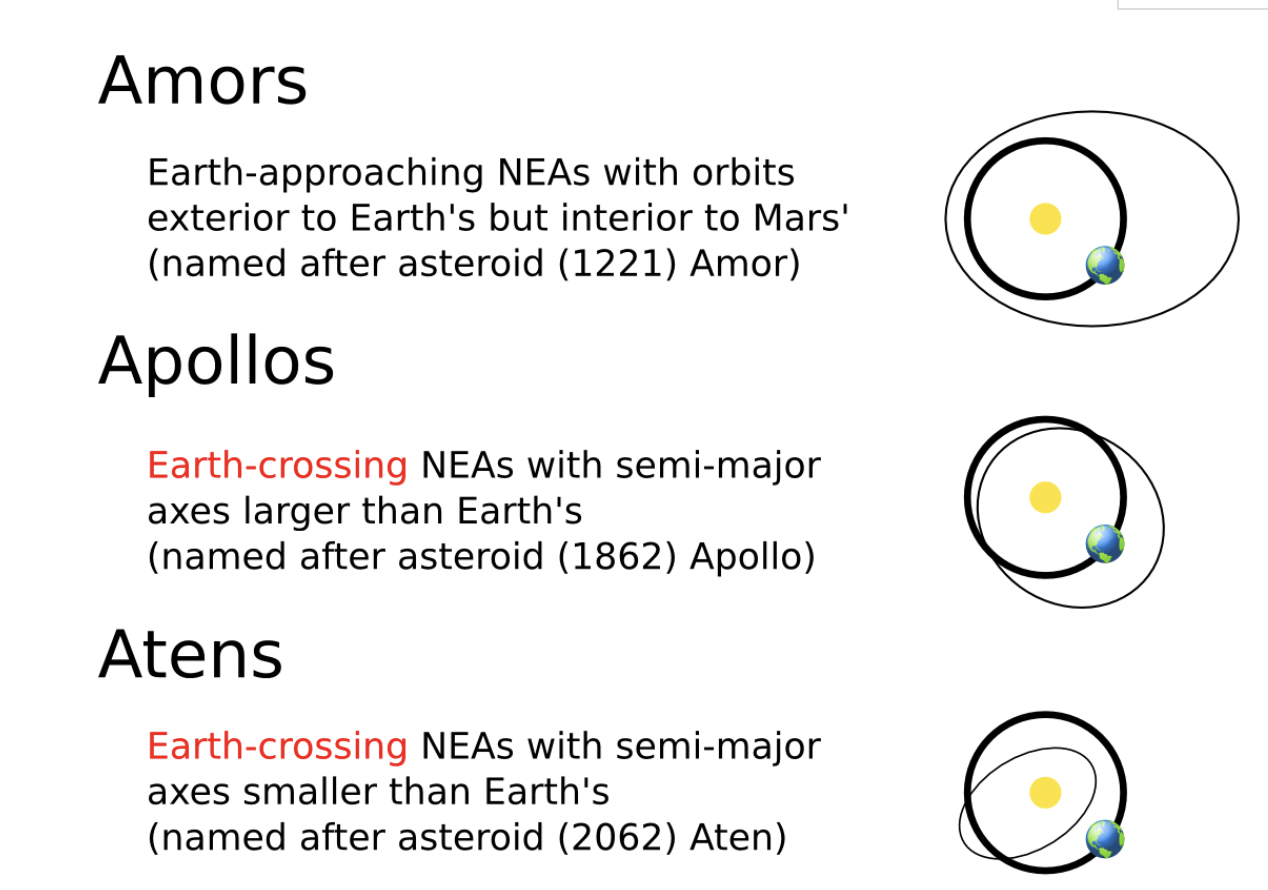

Basically we will be mapping `APO` to `Apollos`, `AMO` to `Amors`, and `ATE` to `Atens`. 

The `.map` [function](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) takes the input of a dictionary or series. In this case we will use a dictionary. It is also a good idea to add `na_action='ignore'` to make sure that no `NaN` values are accidentally mapped. We want any of those to remain `NaN`. 

We will be returned a series with the new mapped values, which we can  replace the old `orbit_class_type` column with or add to our `neo` dataframe as a new column entirely. 

In [15]:
new_orbit_class_type = neo.orbit_class_type.map({'APO': 'Apollos', 'AMO': 'Amors', \
                                                 'ATE': 'Atens'}, na_action='ignore')
new_orbit_class_type

0     Apollos
1       Amors
2       Amors
3       Atens
4     Apollos
       ...   
95      Amors
96    Apollos
97    Apollos
98      Amors
99    Apollos
Name: orbit_class_type, Length: 100, dtype: object

In [16]:
neo.dtypes

id                                     int64
neo_reference_id                       int64
name                                  object
name_limited                          object
designation                            int64
absolute_magnitude_h                 float64
is_potentially_hazardous_asteroid       bool
is_sentry_object                        bool
kilometers_estimated_diameter_min    float64
kilometers_estimated_diameter_max    float64
orbit_id                               int64
orbit_class_type                      object
perihelion_distance                  float64
aphelion_distance                    float64
first_observation_date                object
last_observation_date                 object
orbit_class_description               object
dtype: object

In [17]:
neo = neo.astype({'is_sentry_object': 'object'}, copy = True)
neo['is_sentry_object'][0]
#neo.is_sentry_object.map({'True': 'sentry object', 'False': 'not a sentry object'}, na_action ='ignore')

False

## Cutting a numeric column into classifications 

Another type of mapping that is useful is converting numerical data to categorical data. In this case we are mapping a numerical value into a certain category that we define. We can accomplish this using `pd.cut`. 

Let's map the values in `perihelion_distance` into categories. Perihelion distance is simply the distance from the sun at the point in the orbit when the object is closest to the sun. This is in constrast to aphelion distance, which is the distance at which the object is furthest from the sun. This diagram shows aphelion/perihelion distances for Earth. 

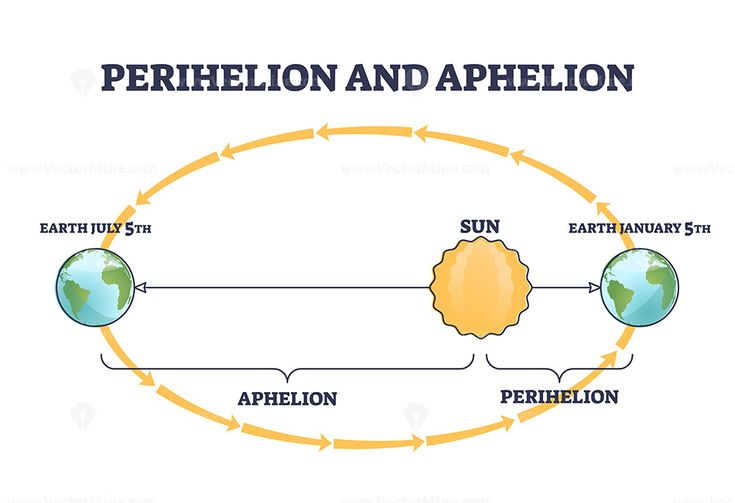

Let's split the `perihelion_distance` values into percentiles with labels. First let's get the percentile values using `.describe()`. Then, we can apply `.cut`. 

In [18]:
neo.perihelion_distance.describe()

count    100.000000
mean       0.892326
std        0.288459
min        0.140146
25%        0.639333
50%        0.957297
75%        1.132804
max        1.294678
Name: perihelion_distance, dtype: float64

In [19]:
bins = [0, 0.63, 0.95, 1.13, 1.3]
names = ['<25th percentile', '25th - 50th percentile', '50th - 75th percentile', '>75th percentile']

neo['perihelion_distance_category'] = pd.cut(neo['perihelion_distance'], bins, labels=names)

# look at values
neo[['perihelion_distance', 'perihelion_distance_category']] 

,perihelion_distance,perihelion_distance_category
0,0.621512,<25th percentile
1,1.238537,>75th percentile
2,1.050403,50th - 75th percentile
3,0.790185,25th - 50th percentile
4,0.701397,25th - 50th percentile
...,...,...
95,1.174914,>75th percentile
96,0.676204,25th - 50th percentile
97,0.958450,50th - 75th percentile
98,1.294678,>75th percentile


<hr style="border:2px solid gray"> </hr>

### Now you try! 

The absolute magnitude (H) is how big the object looks if hypothetically placed 1 astronomical unit away. Map the values of the `absolute_magnitude_h` into three categories, `small`, `medium` and `large`. Determine how best to cut these categories. 


In [31]:
### BEGIN SOLUTION 

import numpy as np 
bins = [neo.absolute_magnitude_h.min(), np.percentile(neo.absolute_magnitude_h, 25), \
        np.percentile(neo.absolute_magnitude_h, 75), neo.absolute_magnitude_h.max()]
names = ['small', 'medium', 'large']

neo['absolute_magnitude_h_category'] = pd.cut(neo['absolute_magnitude_h'], bins, labels=names)
neo[['absolute_magnitude_h', 'absolute_magnitude_h_category']]

### END SOLUTION 

,absolute_magnitude_h,absolute_magnitude_h_category
0,15.22,small
1,15.97,medium
2,16.36,medium
3,17.10,medium
4,17.28,medium
...,...,...
95,15.81,medium
96,18.49,large
97,14.02,small
98,15.96,medium


<hr style="border:2px solid gray"> </hr>

## Categorical data frequencies 

You may want to know how often a certain categorical variable occurs. 


# Practice on your own 

#### Exercise 1. 